# Section 5: Math, numpy, PyTorch

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import scipy.stats as stats
import sympy as sym
import sympy.plotting.plot as symplot
from IPython.display import display

## Transpose

In [2]:
n_v = np.array([[1, 2, 3, 4]])

print(n_v)
print()

n_v_T = n_v.T

print(n_v_T)
print()
print(n_v_T.T)

[[1 2 3 4]]

[[1]
 [2]
 [3]
 [4]]

[[1 2 3 4]]


In [3]:
n_M = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(n_M)
print()

n_M_T = n_M.T

print(n_M_T)
print()
print(n_M_T.T)

[[1 2 3 4]
 [5 6 7 8]]

[[1 5]
 [2 6]
 [3 7]
 [4 8]]

[[1 2 3 4]
 [5 6 7 8]]


In [4]:
t_v = torch.tensor([[1, 2, 3, 4]])

print(t_v)
print()

t_v_T = t_v.T

print(t_v)
print()
print(t_v_T.T)

tensor([[1, 2, 3, 4]])

tensor([[1, 2, 3, 4]])

tensor([[1, 2, 3, 4]])


In [5]:
t_M = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(t_M)
print()

t_M_T = t_M.T

print(t_M_T)
print()
print(t_M_T.T)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

tensor([[1, 5],
        [2, 6],
        [3, 7],
        [4, 8]])

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


In [6]:
print(f"Variable n_v is of type: {type(n_v)}.")
print(f"Variable n_M is of type: {type(n_M)}.")
print(f"Variable t_v is of type: {type(t_v)}.")
print(f"Variable t_M is of type: {type(t_M)}.")

Variable n_v is of type: <class 'numpy.ndarray'>.
Variable n_M is of type: <class 'numpy.ndarray'>.
Variable t_v is of type: <class 'torch.Tensor'>.
Variable t_M is of type: <class 'torch.Tensor'>.


## Dot product

In [7]:
n_v_1 = np.array([1, 2, 3, 4])
n_v_2 = np.array([0, 1, 0, -1])

print(np.dot(n_v_1, n_v_2))
print(np.sum(n_v_1 * n_v_2))

-2
-2


In [8]:
t_v_1 = torch.tensor([1, 2, 3, 4])
t_v_2 = torch.tensor([0, 1, 0, -1])

print(torch.dot(t_v_1, t_v_2))
print(torch.sum(t_v_1 * t_v_2))

tensor(-2)
tensor(-2)


## Matrix multiplication

In [9]:
A = np.random.randn(3, 4)
B = np.random.randn(4, 5)
C = np.random.randn(3, 7)

print(np.round(A@B, 2))
print()
print(np.round(C.T@A, 2))

[[-2.26 -1.24  0.69  1.46 -0.34]
 [-1.01  1.07 -0.49  0.47 -0.06]
 [ 0.75  0.78 -0.25  0.71  0.75]]

[[-0.13  0.49 -0.47 -0.48]
 [-1.4   0.76 -1.35 -0.54]
 [ 2.22 -0.46  1.32 -0.03]
 [-0.2  -1.46 -3.39 -1.03]
 [-1.09  1.59 -1.26 -1.11]
 [ 0.44 -0.1  -0.71 -0.55]
 [ 0.5  -0.45  0.14  0.1 ]]


In [10]:
A = torch.randn(3, 4)
B = torch.randn(4, 5)
C1 = np.random.randn(4, 7)
C2 = torch.tensor(C1, dtype=torch.float)

print(torch.round(A@B, decimals=2))
print(torch.round(A@C2, decimals=2))

tensor([[-0.2900, -2.8300, -2.0900,  0.6600, -0.3200],
        [-0.4900, -2.4900, -3.7100,  1.2200, -1.3300],
        [-0.2000, -1.0400, -0.5100,  1.7400, -1.0900]])
tensor([[-1.7500,  0.6800, -0.6000,  0.4200,  1.4700,  0.5500, -1.3100],
        [ 0.4200,  1.2000, -0.3300,  1.9300, -0.1600,  1.4200,  0.5500],
        [-0.9400, -0.2600, -2.0500,  0.4000,  1.2100,  0.3400, -0.2800]])


## Softmax

In [11]:
z = [1, 2, 3]

num = np.exp(z)
den = np.sum(num)
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[ 5  2 14 14 11]


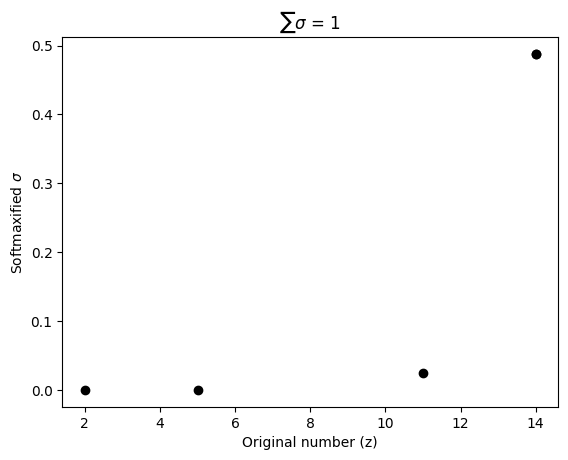

In [12]:
z = np.random.randint(-5, high=15, size=5)

print(z)

num = np.exp(z)
den = np.sum(num)
sigma = num / den

plt.plot(z, sigma, 'ko')
plt.xlabel("Original number (z)")
plt.ylabel(r"Softmaxified $\sigma$")
plt.title(r"$\sum \sigma$ = %g" % np.sum(sigma))
plt.show()

In [13]:
softmax = nn.Softmax(dim=0)

sigma_t = softmax(torch.Tensor(z))

print(np.round(sigma_t, 3))

tensor([0.0000, 0.0000, 0.4880, 0.4880, 0.0240])


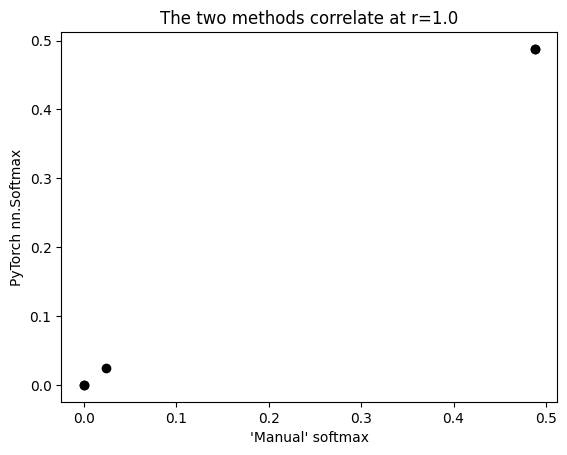

In [14]:
plt.plot(sigma, sigma_t, 'ko')
plt.xlabel("'Manual' softmax")
plt.ylabel("PyTorch nn.Softmax")
plt.title(f"The two methods correlate at r={np.corrcoef(sigma, sigma_t)[0, 1]}")
plt.show()

## Logarithms

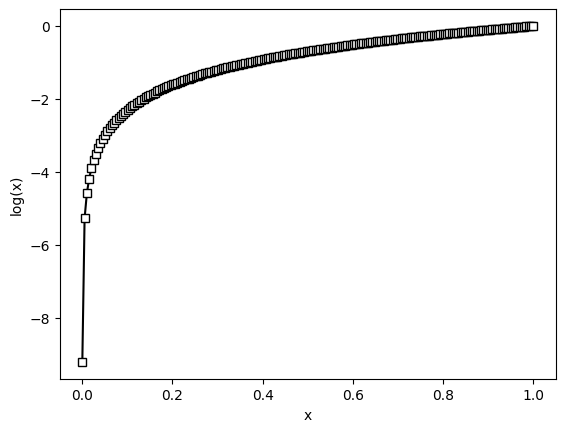

In [15]:
x = np.linspace(.0001, 1, 200)
log_x = np.log(x)
fig = plt.figure()

plt.plot(x, log_x, 'ks-', markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

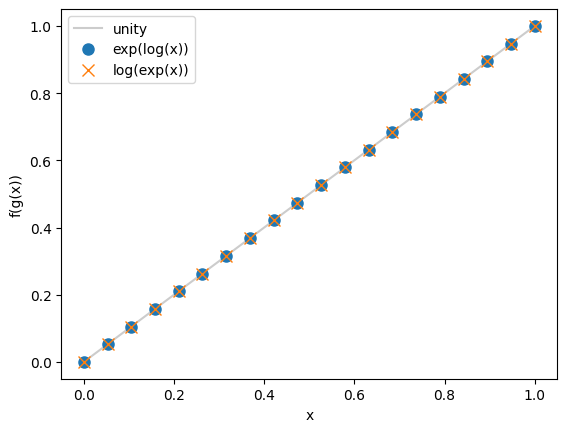

In [16]:
x = np.linspace(.0001, 1, 20)
log_x = np.log(x)
exp_x = np.exp(x)

plt.plot(x, x, color=[.8, .8, .8])
plt.plot(x, np.exp(log_x), 'o', markersize=8)
plt.plot(x, np.log(exp_x), 'x', markersize=8)
plt.xlabel('x')
plt.ylabel('f(g(x))')
plt.legend(['unity', 'exp(log(x))', 'log(exp(x))'])
plt.show()

## Entropy and cross-entropy

In [17]:
X = [.25, .75]

H = 0

for p in X:
    H -= p * np.log(p)
    
print(H)

0.5623351446188083


In [18]:
p = [1, 0]
q = [.25, .75]
H = 0

for i in range(len(p)):
    H -= p[i] * np.log(q[i])
    
print(H)

1.3862943611198906


In [19]:
p_tensor = torch.Tensor(p)
q_tensor = torch.Tensor(q)

F.binary_cross_entropy(q_tensor, p_tensor)

tensor(1.3863)

## Min/max and argmin/argmax

In [20]:
v = np.array([1, 40, 2, -3])

min_val = np.min(v)
max_val = np.max(v)

print("Min: %g, max: %g" %(min_val, max_val))

min_idx = np.argmin(v)
max_idx = np.argmax(v)

print("Min index: %g, max index: %g" %(min_idx, max_idx))

Min: -3, max: 40
Min index: 3, max index: 1


In [21]:
M = np.array([
    [0, 1, 10],
    [20, 8, 5]
])

print(M)
print(np.min(M))
print()
print(np.min(M, axis=0))
print(np.argmin(M, axis=0))
print()
print(np.min(M, axis=1))
print(np.argmin(M, axis=1))

[[ 0  1 10]
 [20  8  5]]
0

[0 1 5]
[0 0 1]

[0 5]
[0 2]


In [22]:
v = torch.Tensor(v)

min_val = torch.min(v)
max_val = torch.max(v)

print("Min: %g, max: %g" %(min_val, max_val))

min_idx = torch.argmin(v)
max_idx = torch.argmax(v)

print("Min index: %g, max index: %g" %(min_idx, max_idx))

Min: -3, max: 40
Min index: 3, max index: 1


In [23]:
M = torch.Tensor(M)

print(M)
print(torch.min(M))
print()

min_1 = torch.min(M, axis=0)
min_2 = torch.min(M, axis=1)

print(min_1.values)
print(min_1.indices)
print()
print(min_2.values)
print(min_2.indices)

tensor([[ 0.,  1., 10.],
        [20.,  8.,  5.]])
tensor(0.)

tensor([0., 1., 5.])
tensor([0, 0, 1])

tensor([0., 5.])
tensor([0, 2])


## Mean and variance

In [24]:
x = [1, 2, 4, 6, 5, 4, 0]
n = len(x)

mean_1 = np.mean(x)
mean_2 = np.sum(x) / n

print(mean_1)
print(mean_2)

3.142857142857143
3.142857142857143


In [25]:
var_1 = np.var(x, ddof=1)
var_2 = (1 / (n - 1)) * np.sum((x - mean_1) ** 2)

print(var_1)
print(var_2)

4.809523809523809
4.809523809523809


In [26]:
x = torch.Tensor(x)

mean_1 = torch.mean(x)
mean_2 = torch.sum(x) / n

print(mean_1)
print(mean_2)

tensor(3.1429)
tensor(3.1429)


In [27]:
var_1 = torch.var(x)
var_2 = (1 / (n - 1)) * torch.sum((x - mean_1) ** 2)

print(var_1)
print(var_2)

tensor(4.8095)
tensor(4.8095)


## Random sampling and sampling variability

In [28]:
x = [1, -2, 4, 11, 3, -4, -16, 12, 0, -1, 10]
n = len(x)

pop_mean = np.mean(x)
sample = np.random.choice(x, size=5, replace=True)
sample_mean = np.mean(sample)

print(pop_mean)
print(sample_mean)

1.6363636363636365
3.4


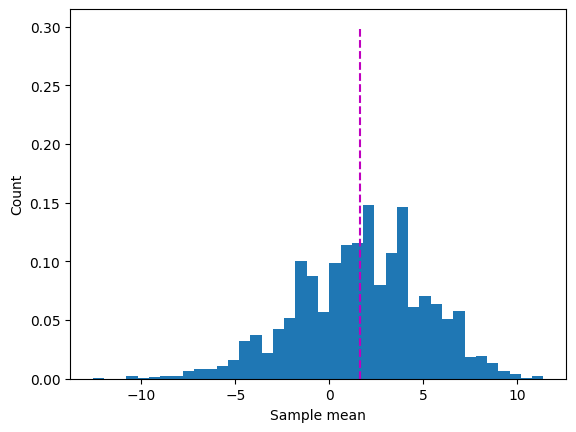

In [29]:
experiments_nr = 10000
sample_means = np.zeros(experiments_nr)

for i in range(experiments_nr):
    sample = np.random.choice(x, size=5, replace=True)
    sample_means[i] = np.mean(sample)

plt.hist(sample_means, bins=40, density=True)
plt.plot([pop_mean, pop_mean], [0, .3], 'm--')
plt.ylabel('Count')
plt.xlabel('Sample mean')
plt.show()

## Reproducible randomness via seeding

In [30]:
np.random.randn(5)

array([ 1.70625962,  0.32383699, -1.01795507, -2.34022129,  1.70469591])

In [31]:
np.random.seed(5)

print(np.random.randn(5))
print(np.random.randn(5))

[ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984]
[ 1.58248112 -0.9092324  -0.59163666  0.18760323 -0.32986996]


In [32]:
rand_seed_1 = np.random.RandomState(17)
rand_seed_2 = np.random.RandomState(20210530)

print(rand_seed_1.randn(5))
print(rand_seed_2.randn(5))
print(rand_seed_1.randn(5))
print(rand_seed_2.randn(5))
print(np.random.randn(5))

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]
[-1.19276461 -0.20487651 -0.35882895  0.6034716  -1.66478853]


In [33]:
torch.randn(5)

tensor([-0.1382, -1.0021,  0.4933,  0.5527,  1.8889])

In [34]:
torch.manual_seed(17)

print(torch.randn(5))
print(np.random.randn(5))

tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])
[-0.70017904  1.15139101  1.85733101 -1.51117956  0.64484751]


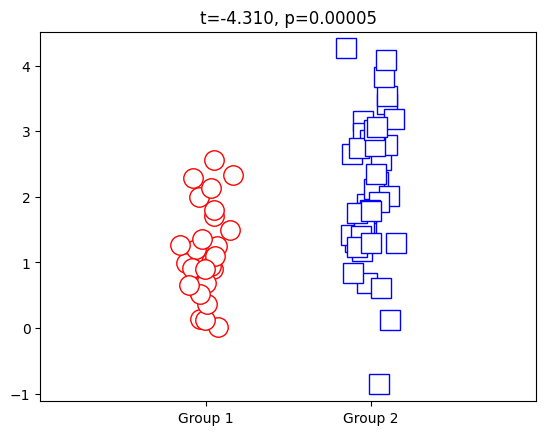

In [35]:
n_1 = 30
n_2 = 40
mu_1 = 1
mu_2 = 2

data_1 = mu_1 + np.random.randn(n_1)
data_2 = mu_2 + np.random.randn(n_2)
t, p = stats.ttest_ind(data_1, data_2)

plt.plot(0 + np.random.randn(n_1) / 15, data_1, 'ro', markerfacecolor='w', markersize=14)
plt.plot(1 + np.random.randn(n_2) / 15, data_2, 'bs', markerfacecolor='w', markersize=14)
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Group 1', 'Group 2'])
plt.title(f"t={t:.3f}, p={p:.5f}")
plt.show()

## Derivatives

In [36]:
x = sym.symbols('x')

fx = 2 * x ** 2

df = sym.diff(fx, x)

print(fx)
print(df)

2*x**2
4*x


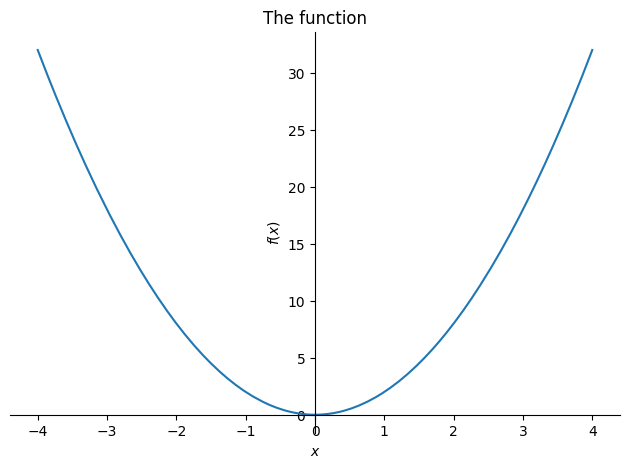

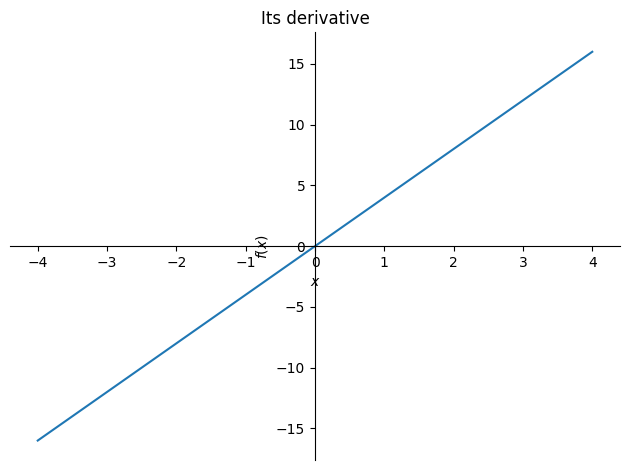

In [37]:
symplot(fx, (x, -4, 4), title="The function")
symplot(df, (x, -4, 4), title="Its derivative")

plt.show()

In [38]:
x = sym.symbols('x')

fx = 2 * x ** 2
gx = 4 * x ** 3 - 3 * x ** 4

df = sym.diff(fx)
dg = sym.diff(gx)

manual = df * gx + fx * dg
via_sympy = sym.diff(fx * gx)

print("The functions:")
display(fx)
display(gx)
print()

print("The derivatives:")
display(df)
display(dg)
print()

print("Manual product rule:")
display(manual)
print()

print("Via sympy:")
display(via_sympy)
print()

The functions:


2*x**2

-3*x**4 + 4*x**3


The derivatives:


4*x

-12*x**3 + 12*x**2


Manual product rule:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)


Via sympy:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

In [39]:
gx = x ** 2 + 4 * x ** 3
fx = gx ** 5

print("The function:")
display(fx)
print()

print("Its derivative:")
display(sym.diff(fx))

The function:


(4*x**3 + x**2)**5


Its derivative:


(60*x**2 + 10*x)*(4*x**3 + x**2)**4